In [1]:
import numpy as np # para processamento de algébrico
import pandas as pd # para processamento de dados, DataFrame, arquivos csv, I/O
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

# Data preparation

Preparando os dados

In [2]:
df = pd.read_csv('Desktop/natural-gas-consumption-by-zip-code-2010.csv')
df.head()

,Zip Code,Building type (service class,Consumption (therms),Consumption (GJ),Utility/Data Source
0,10300\n,Commercial,470.0,50.0,National Grid
1,10335\n,Commercial,647.0,68.0,National Grid
2,10360\n,Large residential,33762.0,3562.0,National Grid
3,11200\n,Commercial,32125.0,3389.0,National Grid
4,11200\n,Institutional,3605.0,380.0,National Grid


In [6]:
display(df)

,Zip Code,Building type (service class,Consumption (therms),Consumption (GJ),Utility/Data Source
0,10300\n,Commercial,470.0,50.0,National Grid
1,10335\n,Commercial,647.0,68.0,National Grid
2,10360\n,Large residential,33762.0,3562.0,National Grid
3,11200\n,Commercial,32125.0,3389.0,National Grid
4,11200\n,Institutional,3605.0,380.0,National Grid
...,...,...,...,...,...
1010,"11367\n(40.730323085042414, -73.82610630716033)",Residential,2905831.0,306581.0,ConEd
1011,"10457\n(40.84579837129786, -73.89832418681175)",Residential,1697773.0,179125.0,ConEd
1012,"10461\n(40.846960590359004, -73.840632836736)",Large Residential,9651221.0,1018258.0,ConEd
1013,"11420\n(40.67334524268887, -73.81770717164864)",Commercial,8380985.0,884241.0,National Grid


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Zip Code                      1015 non-null   object 
 1   Building type (service class  1015 non-null   object 
 2    Consumption (therms)         1005 non-null   float64
 3    Consumption (GJ)             1005 non-null   float64
 4   Utility/Data Source           1015 non-null   object 
dtypes: float64(2), object(3)
memory usage: 39.8+ KB


In [4]:
df.describe()

,Consumption (therms),Consumption (GJ)
count,1.005000e+03,1.005000e+03
mean,2.750244e+06,2.901661e+05
std,4.297262e+06,4.533852e+05
min,1.000000e+00,0.000000e+00
25%,1.643790e+05,1.734300e+04
50%,1.165816e+06,1.230000e+05
75%,3.446607e+06,3.636360e+05
max,4.274765e+07,4.510117e+06


In [9]:
# renomeando as colunas
df.columns = ['Zip Code', 'Building Type', 'Consumption (Therms)', 'Consumption (GJ)', 'Source']
df.head(3)

,Zip Code,Building Type,Consumption (Therms),Consumption (GJ),Source
0,10300\n,Commercial,470.0,50.0,National Grid
1,10335\n,Commercial,647.0,68.0,National Grid
2,10360\n,Large residential,33762.0,3562.0,National Grid


In [10]:
# tratar algumas informações, coluna de ZIPCODE tem lat e long junto com o ZIPCODE, vamos separar em 2 colunas
df['Zip Code'] = df['Zip Code'].str.replace('\n', '')
df['Zip Code'] = df['Zip Code'].str.replace(' ', '')
df['Zip Code'] = df['Zip Code'].str.split('(')
df['LongLat'] = df['Zip Code'].str[1]
df['Zip Code'] = df['Zip Code'].str[0]
print(df['Zip Code'].unique())

['10300' '10335' '10360' '11200' '11254' '11274' '11279' '11303' '11313'
 '11314' '11315' '11323' '11332' '11335' '11337' '11343' '11350' '11388'
 '11400' '11402' '11403' '11438' '11441' '11446' '11450' '11468' '11469'
 '11472' '11473' '11474' '11475' '11477' '11478' '11479' '11485' '11696'
 '10007' '10002' '10012' '10003' '10001' '10013' '10005' '10006' '10010'
 '10009' '10011' '10075' '11103' '11105' '11432' '10031' '10466' '10459'
 '11413' '10451' '11434' '11209' '10464' '11415' '10302' '11385' '11201'
 '11208' '11212' '11001' '11230' '11239' '10305' '10458' '10040' '10080'
 '11231' '11377' '11106' '11102' '10027' '11355' '10465' '10039' '11361'
 '10467' '10034' '10307' '10029' '11429' '11416' '11362' '11366' '11207'
 '11004' '11375' '11220' '11367' '11374' '11222' '11418' '10474' '10308'
 '10452' '11356' '10021' '11238' '11419' '10038' '10014' '10469' '11365'
 '10024' '11368' '11040' '11215' '11357' '11378' '10030' '11206' '11218'
 '11372' '11421' '10128' '11426' '10025' '10018' '1

In [12]:
# vamos ver como está o novo formato
display(df)

,Zip Code,Building Type,Consumption (Therms),Consumption (GJ),Source,LongLat
0,10300,Commercial,470.0,50.0,National Grid,NaN
1,10335,Commercial,647.0,68.0,National Grid,NaN
2,10360,Large residential,33762.0,3562.0,National Grid,NaN
3,11200,Commercial,32125.0,3389.0,National Grid,NaN
4,11200,Institutional,3605.0,380.0,National Grid,NaN
...,...,...,...,...,...,...
1010,11367,Residential,2905831.0,306581.0,ConEd,"40.730323085042414,-73.82610630716033)"
1011,10457,Residential,1697773.0,179125.0,ConEd,"40.84579837129786,-73.89832418681175)"
1012,10461,Large Residential,9651221.0,1018258.0,ConEd,"40.846960590359004,-73.840632836736)"
1013,11420,Commercial,8380985.0,884241.0,National Grid,"40.67334524268887,-73.81770717164864)"


In [13]:
df['Building Type'].unique()   # mostra os valores possiveis desta coluna

array(['Commercial', 'Large residential', 'Institutional',
       'Small residential', 'Industrial', 'Residential',
       'Large Residential'], dtype=object)

In [14]:
# Apenas adequando a formatação do texto
df['Building Type'] = df['Building Type'].str.replace('Large residential', 'Large Residential')
df['Building Type'] = df['Building Type'].str.replace('Small residential', 'Small Residential')

In [22]:
df.tail(5)

,Zip Code,Building Type,Consumption (Therms),Consumption (GJ),Source,LongLat
1010,11367,Residential,2905831.0,306581.0,ConEd,"40.730323085042414,-73.82610630716033)"
1011,10457,Residential,1697773.0,179125.0,ConEd,"40.84579837129786,-73.89832418681175)"
1012,10461,Large Residential,9651221.0,1018258.0,ConEd,"40.846960590359004,-73.840632836736)"
1013,11420,Commercial,8380985.0,884241.0,National Grid,"40.67334524268887,-73.81770717164864)"
1014,10065,Commercial,13811460.0,1457186.0,ConEd,"40.76430121303059,-73.96303993544461)"


In [23]:
df['Source'].unique()

array(['National Grid', 'ConEd'], dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Zip Code              1015 non-null   object 
 1   Building Type         1015 non-null   object 
 2   Consumption (Therms)  1005 non-null   float64
 3   Consumption (GJ)      1005 non-null   float64
 4   Source                1015 non-null   object 
 5   LongLat               964 non-null    object 
dtypes: float64(2), object(4)
memory usage: 47.7+ KB


In [26]:
# VAmos separar latitude e longitude
df['LongLat'] = df['LongLat'].str.replace(')', '')
df['LongLat'] = df['LongLat'].str.split(',')
df['Longitude'] = df['LongLat'].str[0]
df['Latitude'] = df['LongLat'].str[1]
df.drop('LongLat', axis=1, inplace=True)
df.tail(10)

C:\Users\arthu\AppData\Local\Temp\ipykernel_11784\2425052830.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['LongLat'] = df['LongLat'].str.replace(')', '')


,Zip Code,Building Type,Consumption (Therms),Consumption (GJ),Source,Longitude,Latitude
1005,11109,Commercial,752231.0,79365.0,ConEd,40.744414792408804,-73.95770234668589
1006,11216,Commercial,1795793.0,189466.0,National Grid,40.680758670876,-73.94926775090596
1007,11213,Small Residential,5855036.0,617739.0,National Grid,40.67122516920625,-73.93644336636822
1008,11426,Small Residential,2754.0,291.0,National Grid,40.73704138495202,-73.72415699894628
1009,10037,Large Residential,4228025.0,446080.0,ConEd,40.81329776108288,-73.93728252556804
1010,11367,Residential,2905831.0,306581.0,ConEd,40.730323085042414,-73.82610630716033
1011,10457,Residential,1697773.0,179125.0,ConEd,40.84579837129786,-73.89832418681175
1012,10461,Large Residential,9651221.0,1018258.0,ConEd,40.846960590359004,-73.840632836736
1013,11420,Commercial,8380985.0,884241.0,National Grid,40.67334524268887,-73.81770717164864
1014,10065,Commercial,13811460.0,1457186.0,ConEd,40.76430121303059,-73.96303993544461


# Data Visualization

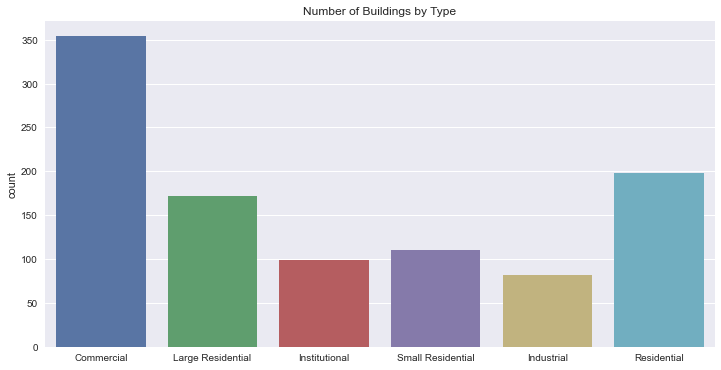

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Building Type')
plt.title('Number of Buildings by Type')
plt.xlabel(None)
plt.show()

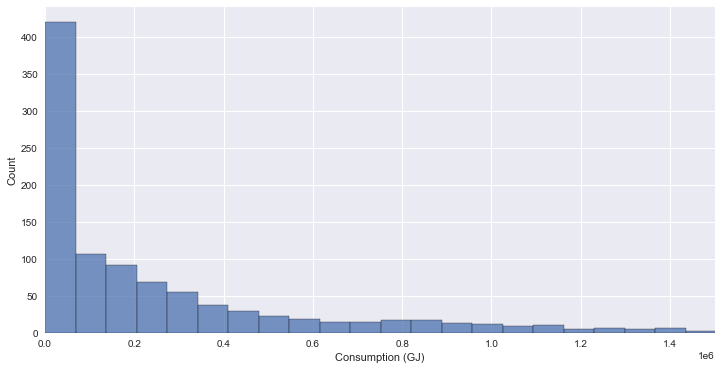

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Consumption (GJ)')
plt.xlim([0,1_500_000])
plt.show()

Podemos inferir que, o consumo de gás é espalhado, ou seja, maioria dos ZIPCODES tem um consumo normal de gás
baixo, mas há também consumo acima de 1(GJ).

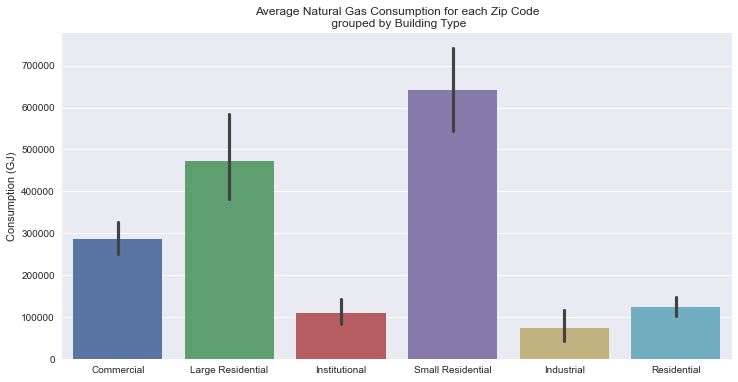

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Building Type', y='Consumption (GJ)')
plt.title('Average Natural Gas Consumption for each Zip Code\n grouped by Building Type')
plt.xlabel(None)
plt.show()

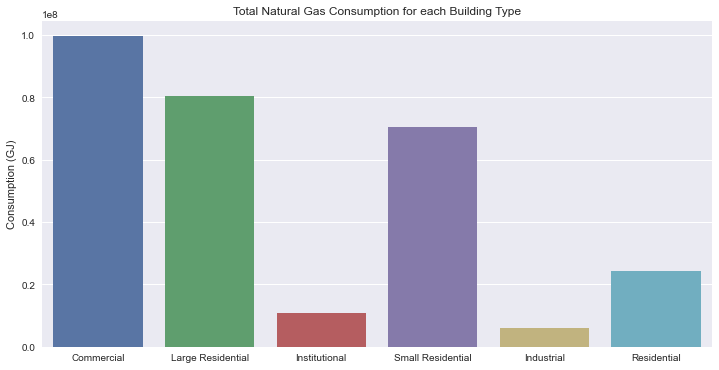

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Building Type', y='Consumption (GJ)', estimator=np.sum, ci=None)
plt.title('Total Natural Gas Consumption for each Building Type')
plt.xlabel(None)
plt.show()

O maior consumo médio de gás veio de "small residential areas" (área residencial pequena), entretanto, o maior consumo total de gás veio de áreas comerciais "Commercial"

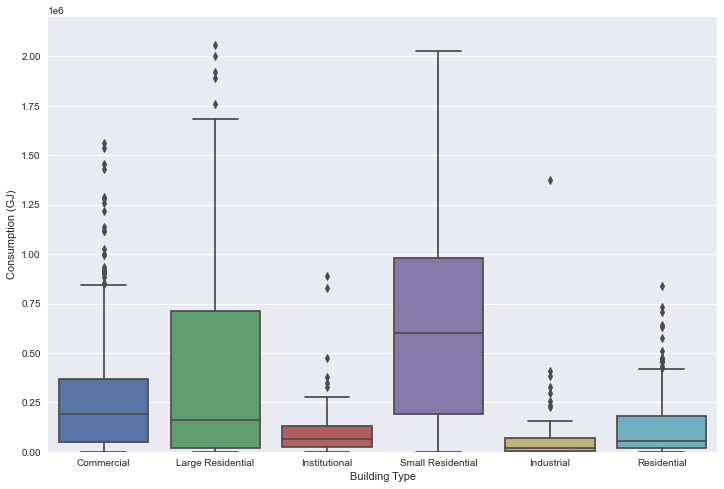

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='Building Type', y='Consumption (GJ)')
plt.ylim([0, 2_200_000])
plt.show()

Analisando o gráfico acima, inferimos que, poucos ZIPCODES tem um consumo de gás acima de 2(GJ), e não aparecem no gráfico.